In [21]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib as Path
from statsmodels.stats.diagnostic import acorr_ljungbox


In [ ]:
folder_path = '../data/vn30'  
features = ['open', 'high', 'low', 'close']
lags = list(range(1, 31))  

# Danh sách lưu kết quả
results = []

# Duyệt qua từng file CSV trong thư mục
for filename in os.listdir(folder_path):
    if filename.endswith('_train.csv'):
        symbol = filename.replace('.csv', '')
        filepath = os.path.join(folder_path, filename)
        df = pd.read_csv(filepath)

        for feature in features:
            if feature in df.columns:
                series = df[feature].dropna()
                try:
                    lb_result = acorr_ljungbox(series, lags=lags, return_df=True)
                    for lag, pval in zip(lb_result.index, lb_result['lb_pvalue']):
                        results.append({
                            'Symbol': symbol,
                            'Feature': feature,
                            'Lag': lag,
                            'P-value': pval
                        })
                except Exception as e:
                    print(f"Lỗi với {symbol} - {feature}: {e}")

# Tạo bảng tổng hợp kết quả
result_df = pd.DataFrame(results)

# Lưu ra file CSV
result_df.to_csv('ljungbox_results.csv', index=False)



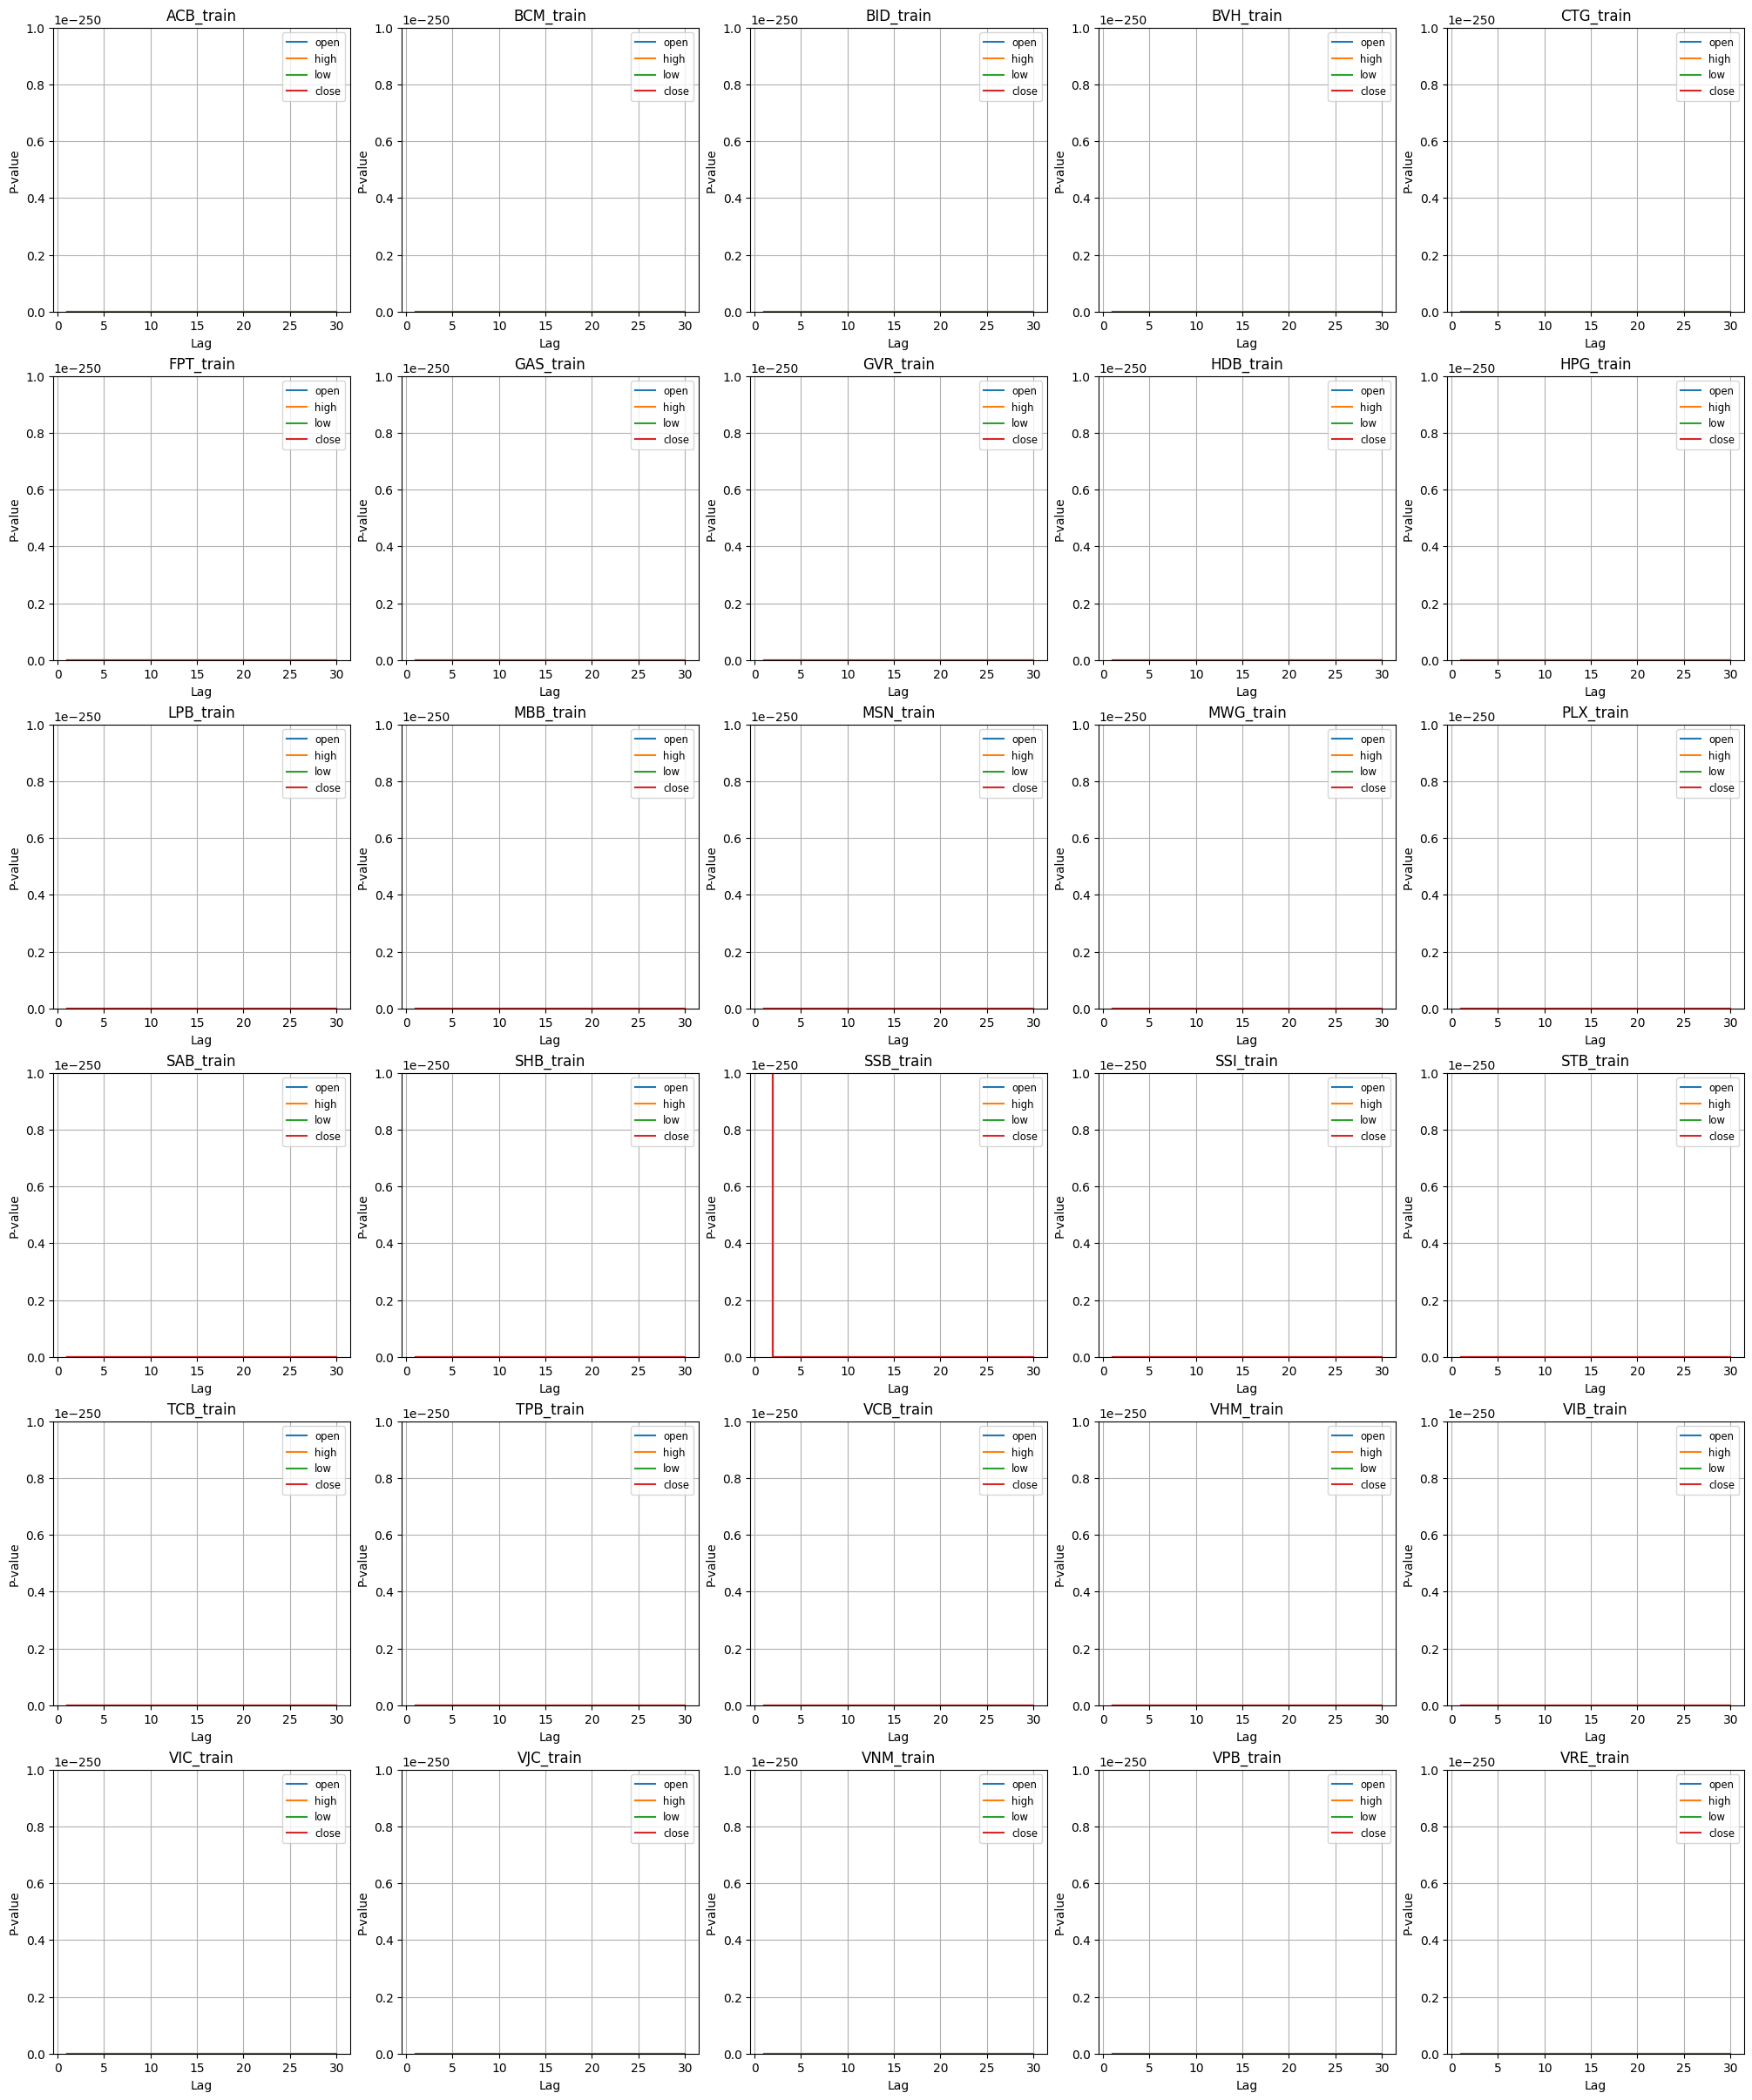

In [ ]:
result_df = pd.read_csv("ljungbox_results.csv")

symbols = sorted(result_df['Symbol'].unique())

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 24), constrained_layout=True)
axes = axes.flatten()

for i, symbol in enumerate(symbols):
    ax = axes[i]
    sub_df = result_df[result_df['Symbol'] == symbol]

    for feature in ['open', 'high', 'low', 'close']:
        feature_df = sub_df[sub_df['Feature'] == feature]
        ax.plot(
            feature_df['Lag'],
            feature_df['P-value'],
            label=feature
        )
    ax.set_title(symbol)
    ax.set_xlabel("Lag")
    ax.set_ylabel("P-value")
    ax.set_ylim(0, 1e-250)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useOffset=False)
    ax.grid(True)
    ax.legend(fontsize="small")

plt.show()
